# 1. Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

adobe = pd.read_excel("Adobe.xlsx")
amazon = pd.read_excel("Amazon.xlsx")
apple = pd.read_excel("Apple.xlsx")
google = pd.read_excel("Google.xlsx")
intel = pd.read_excel("Intel.xlsx")
meta = pd.read_excel("Meta.xlsx")
microsoft = pd.read_excel("Microsoft.xlsx")
netflix = pd.read_excel("Netflix.xlsx")
nvidia = pd.read_excel("NVIDIA.xlsx")
oracle = pd.read_excel("Oracle.xlsx")
Roberta = pd.read_excel("Roberta.xlsx")
dictionary = pd.read_excel("dictionary.xlsx")
Textblob = pd.read_excel("Textblob.xlsx")

IBES = pd.read_excel("IBES_final.xlsx")
Roberta = pd.read_excel("Roberta.xlsx")
dictionary = pd.read_excel("dictionary.xlsx")
Textblob = pd.read_excel("Textblob.xlsx")

def f(r):
    if r<= 0:
        return 0
    if r> 0:
        return 1

def time_50(dataset,x):
    list1 = [] # save the start date of releasing FS
    price = []
    for i in x:
        select = list(np.where(dataset["Exchange Date"] == i)[0])
        list1.append(select[0])
        
    for i in range(len(list1)):
        price.extend([i for i in range(list1[i],list1[i]+51)])# save the upcoming  50 days after releasing FS
    #print(price)
    
    list2 = []
    for i in range(1,10):
        for j in range(i*50,i*50+51):
            A=(dataset["Close"][j]-dataset["Close"][j-1])/dataset["Close"][j-1]
            list2.append(A)
    #print(list2)
    
    list3 = []
    r1 = sum(list2[1:51])/50
    r2 = sum(list2[51:101])/50
    r3 = sum(list2[101:151])/50
    r4 = sum(list2[151:201])/50
    r5 = sum(list2[201:251])/50
    r6 = sum(list2[251:301])/50
    r7 = sum(list2[301:351])/50
    r8 = sum(list2[351:401])/50
    r9 = sum(list2[401:451])/50
    r10 = sum(list2[451:501])/50
    list3.append(r1)
    list3.append(r2)
    list3.append(r3)
    list3.append(r4)
    list3.append(r5)
    list3.append(r6)
    list3.append(r7)
    list3.append(r8)
    list3.append(r9)
    list3.append(r10)
    list4 = [v for v in list3 for i in range(260)]
    dataset["Return"] = list4[0:len(dataset)]
    dataset["Return"] = dataset["Return"].apply(f)
    for t in range(1,7):
        dataset["ac_"+str(t)] = dataset["Return"].shift(t)
        
    return dataset.iloc[price]

In [2]:
AD = time_50(adobe,["2012-01-26","2013-01-22","2014-01-21","2015-01-20","2016-01-19",
                    "2017-01-20","2018-01-22","2019-01-25","2020-01-21","2021-01-15"])

list_roberta=Roberta.iloc[0].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[0].dropna().iloc[1:11]
list_textblob=Textblob.iloc[0].dropna().iloc[1:11]

AD["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[0:10] for i in range(51)]
AD["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[0:10] for i in range(51)]
AD["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[0:10] for i in range(51)]
AD["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[0:10] for i in range(51)]
AD["SENrob"]=[val for val in list_roberta for i in range(51)]
AD["SENdic"]=[val for val in list_dictionary for i in range(51)]
AD["SENtb"]=[val for val in list_textblob for i in range(51)]

train=AD[0:408]
test=AD[408:509]
print(train)
print(test)

     Exchange Date        Close   Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26   241.832080  4287745       0   0.0   0.0   0.0   0.0   
17      2012-01-27   240.771015  4290987       0   0.0   0.0   0.0   0.0   
18      2012-01-30   240.423600  5185002       0   0.0   0.0   0.0   0.0   
19      2012-01-31   240.014155  3753578       0   0.0   0.0   0.0   0.0   
20      2012-02-01   242.306812  4654319       0   0.0   0.0   0.0   0.0   
...            ...          ...      ...     ...   ...   ...   ...   ...   
1822    2019-04-02  2130.016095  1877939       1   1.0   1.0   1.0   1.0   
1823    2019-04-03  2131.084950  2432780       1   1.0   1.0   1.0   1.0   
1824    2019-04-04  2102.641821  2947386       1   1.0   1.0   1.0   1.0   
1825    2019-04-05  2099.241795  1970627       1   1.0   1.0   1.0   1.0   
1826    2019-04-08  2109.325189  1796796       1   1.0   1.0   1.0   1.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT_EBT_dr    SENrob  \
16     0.0   0.

In [3]:
AM = time_50(amazon,["2012-02-01","2013-01-30","2014-01-31","2015-01-30","2016-01-29",
                    "2017-02-10","2018-02-02","2019-02-01","2020-01-31","2021-02-03"])

list_roberta=Roberta.iloc[2].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[2].dropna().iloc[1:11]
list_textblob=Textblob.iloc[2].dropna().iloc[1:11]

AM["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[20:30] for i in range(51)]
AM["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[20:30] for i in range(51)]
AM["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[20:30] for i in range(51)]
AM["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[20:30] for i in range(51)]
AM["SENrob"]=[val for val in list_roberta for i in range(51)]
AM["SENdic"]=[val for val in list_dictionary for i in range(51)]
AM["SENtb"]=[val for val in list_textblob for i in range(51)]

train=pd.concat([train,AM[0:408]],axis=0)
test=pd.concat([test,AM[408:509]],axis=0)
print(train)
print(test)

     Exchange Date         Close   Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26    241.832080  4287745       0   0.0   0.0   0.0   0.0   
17      2012-01-27    240.771015  4290987       0   0.0   0.0   0.0   0.0   
18      2012-01-30    240.423600  5185002       0   0.0   0.0   0.0   0.0   
19      2012-01-31    240.014155  3753578       0   0.0   0.0   0.0   0.0   
20      2012-02-01    242.306812  4654319       0   0.0   0.0   0.0   0.0   
...            ...           ...      ...     ...   ...   ...   ...   ...   
1827    2019-04-09  14395.372192  3714368       0   0.0   0.0   0.0   0.0   
1828    2019-04-10  14476.601545  2963973       0   0.0   0.0   0.0   0.0   
1829    2019-04-11  14462.118975  2654842       0   0.0   0.0   0.0   0.0   
1830    2019-04-12  14454.566662  3114413       0   0.0   0.0   0.0   0.0   
1831    2019-04-15  14463.227339  3724423       0   0.0   0.0   0.0   0.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT_EBT_dr    SENrob   SENd

In [4]:
# 9 years of apple
AP = time_50(apple,["2012-10-31","2013-10-30","2014-10-27","2015-10-28","2016-10-26",
                    "2017-11-03","2018-11-05","2019-10-31","2020-10-30"])

list_roberta=Roberta.iloc[1].dropna().iloc[1:10]
list_dictionary=dictionary.iloc[1].dropna().iloc[1:10]
list_textblob=Textblob.iloc[1].dropna().iloc[1:10]
list_textblob=Textblob.iloc[1].dropna().iloc[1:10]

AP["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[10:19] for i in range(51)]
AP["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[10:19] for i in range(51)]
AP["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[10:19] for i in range(51)]
AP["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[20:29] for i in range(51)]
AP["SENrob"]=[val for val in list_roberta for i in range(51)]
AP["SENdic"]=[val for val in list_dictionary for i in range(51)]
AP["SENtb"]=[val for val in list_textblob for i in range(51)]

train=pd.concat([train,AP[0:408]],axis=0)
test=pd.concat([test,AP[408:509]],axis=0)
print(train)
print(test)

     Exchange Date       Close       Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26  241.832080    4287745.0       0   0.0   0.0   0.0   0.0   
17      2012-01-27  240.771015    4290987.0       0   0.0   0.0   0.0   0.0   
18      2012-01-30  240.423600    5185002.0       0   0.0   0.0   0.0   0.0   
19      2012-01-31  240.014155    3753578.0       0   0.0   0.0   0.0   0.0   
20      2012-02-01  242.306812    4654319.0       0   0.0   0.0   0.0   0.0   
...            ...         ...          ...     ...   ...   ...   ...   ...   
2016    2020-01-08  589.355882  132363784.0       1   1.0   1.0   1.0   1.0   
2017    2020-01-09  601.224052  170486168.0       1   1.0   1.0   1.0   1.0   
2018    2020-01-10  602.497937  140869088.0       1   1.0   1.0   1.0   1.0   
2019    2020-01-13  615.734420  122086888.0       1   1.0   1.0   1.0   1.0   
2020    2020-01-14  607.912456  162613828.0       1   1.0   1.0   1.0   1.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT

In [5]:
GO = time_50(google,["2016-03-29","2017-02-03","2018-02-06","2019-02-06","2020-02-04","2021-02-03"])
list_netinc=[15.83,19.48,12.66,30.74,34.34,40.27]
list_ROE=[0.1386,0.1485,0.084,0.1834,0.1779,0.1903]
list_ROA=[0.1123,0.1234,0.0686,0.1408,0.1319,0.1376]
list_ROI=[0.1661,0.1768,0.1693,0.1604,0.1736,0.1867]
list_GrosMar=[0.6244,0.6108,0.5888,0.5648,0.5558,0.5358]
list_EPS=[22.84,27.85,18.00,43.70,49.16,58.61]
list_roberta=Roberta.iloc[3].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[3].dropna().iloc[1:11]
list_textblob=Textblob.iloc[3].dropna().iloc[1:11]

GO["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[30:36] for i in range(51)]
GO["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[30:36] for i in range(51)]
GO["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[30:36] for i in range(51)]
GO["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[30:36] for i in range(51)]
GO["SENrob"]=[val for val in list_roberta for i in range(51)]
GO["SENdic"]=[val for val in list_dictionary for i in range(51)]
GO["SENtb"]=[val for val in list_textblob for i in range(51)]

train=pd.concat([train,GO[0:203]],axis=0)
test=pd.concat([test,GO[204:305]],axis=0)
print(train)
print(test)

    Exchange Date        Close     Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16     2012-01-26   241.832080  4287745.0       0   0.0   0.0   0.0   0.0   
17     2012-01-27   240.771015  4290987.0       0   0.0   0.0   0.0   0.0   
18     2012-01-30   240.423600  5185002.0       0   0.0   0.0   0.0   0.0   
19     2012-01-31   240.014155  3753578.0       0   0.0   0.0   0.0   0.0   
20     2012-02-01   242.306812  4654319.0       0   0.0   0.0   0.0   0.0   
..            ...          ...        ...     ...   ...   ...   ...   ...   
823    2019-04-11  9486.209575   849947.0       1   1.0   1.0   1.0   1.0   
824    2019-04-12  9589.504571  1215610.0       1   1.0   1.0   1.0   1.0   
825    2019-04-15  9615.627241  1189974.0       1   1.0   1.0   1.0   1.0   
826    2019-04-16  9661.377366  1131099.0       1   1.0   1.0   1.0   1.0   
827    2019-04-17  9729.146328  1518286.0       1   1.0   1.0   1.0   1.0   

     ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT_EBT_dr    SENrob    SENd

In [6]:
IN = time_50(intel,["2012-02-23","2013-02-19","2014-02-14","2015-02-13","2016-02-12",
                    "2017-02-17","2018-02-16","2019-02-01","2020-01-24","2021-01-22"])

list_roberta=Roberta.iloc[4].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[4].dropna().iloc[1:11]
list_textblob=Textblob.iloc[4].dropna().iloc[1:11]

IN["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[36:46] for i in range(51)]
IN["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[36:46] for i in range(51)]
IN["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[36:46] for i in range(51)]
IN["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[36:46] for i in range(51)]
IN["SENrob"]=[val for val in list_roberta for i in range(51)]
IN["SENdic"]=[val for val in list_dictionary for i in range(51)]
IN["SENtb"]=[val for val in list_textblob for i in range(51)]

train=pd.concat([train,IN[0:408]],axis=0)
test=pd.concat([test,IN[408:509]],axis=0)
print(train)
print(test)

     Exchange Date       Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26  241.832080   4287745.0       0   0.0   0.0   0.0   0.0   
17      2012-01-27  240.771015   4290987.0       0   0.0   0.0   0.0   0.0   
18      2012-01-30  240.423600   5185002.0       0   0.0   0.0   0.0   0.0   
19      2012-01-31  240.014155   3753578.0       0   0.0   0.0   0.0   0.0   
20      2012-02-01  242.306812   4654319.0       0   0.0   0.0   0.0   0.0   
...            ...         ...         ...     ...   ...   ...   ...   ...   
1827    2019-04-09  433.780716  13339677.0       0   0.0   0.0   0.0   0.0   
1828    2019-04-10  436.884875  13084042.0       0   0.0   0.0   0.0   0.0   
1829    2019-04-11  437.611500  10845819.0       0   0.0   0.0   0.0   0.0   
1830    2019-04-12  442.485134  12910185.0       0   0.0   0.0   0.0   0.0   
1831    2019-04-15  441.218316  11676910.0       0   0.0   0.0   0.0   0.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT_EBT_dr    S

In [7]:
ME = time_50(meta,["2013-02-01","2014-01-31","2015-02-13","2016-04-27",
                    "2017-02-03","2018-02-01","2019-01-31","2020-01-30","2021-01-28"])

list_roberta=Roberta.iloc[5].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[5].dropna().iloc[1:11]
list_textblob=Textblob.iloc[5].dropna().iloc[1:11]

ME["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[46:55] for i in range(51)]
ME["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[46:55] for i in range(51)]
ME["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[46:55] for i in range(51)]
ME["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[46:55] for i in range(51)]
ME["SENrob"]=[val for val in list_roberta for i in range(51)]
ME["SENdic"]=[val for val in list_dictionary for i in range(51)]
ME["SENtb"]=[val for val in list_textblob for i in range(51)]


train=pd.concat([train,ME[0:357]],axis=0)
test=pd.concat([test,ME[357:458]],axis=0)
print(train)
print(test)

     Exchange Date        Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26   241.832080   4287745.0       0   0.0   0.0   0.0   0.0   
17      2012-01-27   240.771015   4290987.0       0   0.0   0.0   0.0   0.0   
18      2012-01-30   240.423600   5185002.0       0   0.0   0.0   0.0   0.0   
19      2012-01-31   240.014155   3753578.0       0   0.0   0.0   0.0   0.0   
20      2012-02-01   242.306812   4654319.0       0   0.0   0.0   0.0   0.0   
...            ...          ...         ...     ...   ...   ...   ...   ...   
1576    2019-04-08  1372.658217   7297379.0       1   1.0   1.0   1.0   1.0   
1577    2019-04-09  1392.458054  19751031.0       1   1.0   1.0   1.0   1.0   
1578    2019-04-10  1393.486430  11701479.0       1   1.0   1.0   1.0   1.0   
1579    2019-04-11  1392.122175   8070967.0       1   1.0   1.0   1.0   1.0   
1580    2019-04-12  1404.627570  12329812.0       1   1.0   1.0   1.0   1.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT

In [8]:
MI = time_50(microsoft,["2012-07-26","2013-07-30","2014-07-31","2015-07-31","2016-07-28",
                    "2017-08-02","2018-08-03","2019-08-01","2020-07-30","2021-07-29"])
list_netinc=[16.98, 21.86, 22.07, 12.19, 20.54, 25.49, 16.57, 39.24, 44.28, 61.27]
list_ROE=[0.2627, 0.2944, 0.2567, 0.1385, 0.2729, 0.3437, 0.2009, 0.4182, 0.3945, 0.4623]
list_ROA=[0.1480, 0.1659, 0.1414, 0.0701, 0.1128, 0.1117, 0.0657, 0.1472, 0.1542, 0.1964]
list_ROI=[0.2854, 0.3119, 0.2653, 0.1634, 0.2313, 0.2043, 0.2243, 0.2652, 0.3021, 0.3767]
list_GrosMar=[0.7622, 0.7381, 0.6882, 0.6470, 0.6404, 0.6452, 0.6525, 0.6590, 0.6778, 0.6893]
list_EPS=[2, 2.58, 2.63, 1.48, 2.56, 3.25, 2.13, 5.06, 5.76, 8.05]
list_roberta=Roberta.iloc[6].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[6].dropna().iloc[1:11]
list_textblob=Textblob.iloc[6].dropna().iloc[1:11]

MI["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[55:65] for i in range(51)]
MI["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[55:65] for i in range(51)]
MI["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[55:65] for i in range(51)]
MI["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[55:65] for i in range(51)]
MI["SENrob"]=[val for val in list_roberta for i in range(51)]
MI["SENdic"]=[val for val in list_dictionary for i in range(51)]
MI["SENtb"]=[val for val in list_textblob for i in range(51)]

train=pd.concat([train,MI[0:408]],axis=0)
test=pd.concat([test,MI[408:509]],axis=0)
print(train)
print(test)

     Exchange Date        Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26   241.832080   4287745.0       0   0.0   0.0   0.0   0.0   
17      2012-01-27   240.771015   4290987.0       0   0.0   0.0   0.0   0.0   
18      2012-01-30   240.423600   5185002.0       0   0.0   0.0   0.0   0.0   
19      2012-01-31   240.014155   3753578.0       0   0.0   0.0   0.0   0.0   
20      2012-02-01   242.306812   4654319.0       0   0.0   0.0   0.0   0.0   
...            ...          ...         ...     ...   ...   ...   ...   ...   
1952    2019-10-07  1075.336176  16601284.0       1   1.0   1.0   1.0   1.0   
1953    2019-10-08  1064.263315  26783336.0       1   1.0   1.0   1.0   1.0   
1954    2019-10-09  1084.548096  20178482.0       1   1.0   1.0   1.0   1.0   
1955    2019-10-10  1090.766560  18396605.0       1   1.0   1.0   1.0   1.0   
1956    2019-10-11  1095.594048  25551065.0       1   1.0   1.0   1.0   1.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT

In [9]:
NE = time_50(netflix,["2012-02-10","2013-02-01","2014-02-03","2015-01-29","2016-01-28",
                    "2017-01-27","2018-01-29","2019-01-29","2020-01-29","2021-01-28"])
list_netinc=[0.23, 0.02, 0.11, 0.27, 0.12, 0.19, 0.56, 1.21, 1.87, 2.76]
list_ROE=[0.5484, 0.0242, 0.1005, 0.1595, 0.0586, 0.0756, 0.1724, 0.2581, 0.2845, 0.2822]
list_ROA=[0.1170, 0.0046, 0.0234, 0.0406, 0.0125, 0.0154, 0.0335, 0.0526, 0.0611, 0.0736]
list_ROI=[0.5489, 0.0453, 0.1370, 0.1572, 0.0684, 0.0742, 0.1030, 0.1227, 0.1364, 0.1835]
list_GrosMar=[0.3631, 0.2652, 0.2876, 0.3183, 0.3228, 0.2914, 0.3130, 0.3689, 0.3828, 0.3889]
list_EPS=[0.59, 0.04, 0.26, 0.62, 0.28, 0.43, 1.25, 2.68, 4.13, 6.08]
list_roberta=Roberta.iloc[7].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[7].dropna().iloc[1:11]
list_textblob=Textblob.iloc[7].dropna().iloc[1:11]

NE["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[65:75] for i in range(51)]
NE["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[65:75] for i in range(51)]
NE["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[65:75] for i in range(51)]
NE["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[65:75] for i in range(51)]
NE["SENrob"]=[val for val in list_roberta for i in range(51)]
NE["SENdic"]=[val for val in list_dictionary for i in range(51)]
NE["SENtb"]=[val for val in list_textblob for i in range(51)]


train=pd.concat([train,NE[0:408]],axis=0)
test=pd.concat([test,NE[408:509]],axis=0)
print(train)
print(test)

     Exchange Date        Close     Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26   241.832080  4287745.0       0   0.0   0.0   0.0   0.0   
17      2012-01-27   240.771015  4290987.0       0   0.0   0.0   0.0   0.0   
18      2012-01-30   240.423600  5185002.0       0   0.0   0.0   0.0   0.0   
19      2012-01-31   240.014155  3753578.0       0   0.0   0.0   0.0   0.0   
20      2012-02-01   242.306812  4654319.0       0   0.0   0.0   0.0   0.0   
...            ...          ...        ...     ...   ...   ...   ...   ...   
1824    2019-04-04  2887.453332  4627305.0       1   1.0   1.0   1.0   1.0   
1825    2019-04-05  2868.767559  3905493.0       1   1.0   1.0   1.0   1.0   
1826    2019-04-08  2835.948129  4653810.0       1   1.0   1.0   1.0   1.0   
1827    2019-04-09  2859.800523  5439228.0       1   1.0   1.0   1.0   1.0   
1828    2019-04-10  2851.859080  4545561.0       1   1.0   1.0   1.0   1.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT_EBT_dr    S

In [10]:
NV = time_50(nvidia,["2012-03-13","2013-03-12","2014-03-13","2015-03-12","2016-03-17",
                    "2017-03-01","2018-02-28","2019-02-21","2020-02-20","2021-02-26"])
list_netinc=[0.58, 0.56, 0.44, 0.63, 0.61, 1.67, 3.05, 4.14, 2.8, 4.33]
list_ROE=[0.1523, 0.1229, 0.0990, 0.1476, 0.1390, 0.3372, 0.4701, 0.4688, 0.2574, 0.2925]
list_ROA=[0.1148, 0.0933, 0.0709, 0.0905, 0.0852, 0.1959, 0.3056, 0.3229, 0.1806, 0.1664]
list_ROI=[0.1689, 0.1413, 0.1035, 0.1340, 0.1358, 0.3226, 0.3789, 0.3516, 0.2214, 0.2131]
list_GrosMar=[0.5145, 0.5203, 0.5492, 0.5551, 0.5611, 0.5880, 0.5993, 0.6121, 0.6199, 0.6234]
list_EPS=[0.24, 0.23, 0.19, 0.28, 0.27, 0.64, 1.21, 1.66, 1.13, 1.73]
list_roberta=Roberta.iloc[8].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[8].dropna().iloc[1:11]
list_textblob=Textblob.iloc[8].dropna().iloc[1:11]

NV["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[75:85] for i in range(51)]
NV["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[75:85] for i in range(51)]
NV["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[75:85] for i in range(51)]
NV["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[75:85] for i in range(51)]
NV["SENrob"]=[val for val in list_roberta for i in range(51)]
NV["SENdic"]=[val for val in list_dictionary for i in range(51)]
NV["SENtb"]=[val for val in list_textblob for i in range(51)]


train=pd.concat([train,NV[0:408]],axis=0)
test=pd.concat([test,NV[408:509]],axis=0)
print(train)
print(test)

     Exchange Date       Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26  241.832080   4287745.0       0   0.0   0.0   0.0   0.0   
17      2012-01-27  240.771015   4290987.0       0   0.0   0.0   0.0   0.0   
18      2012-01-30  240.423600   5185002.0       0   0.0   0.0   0.0   0.0   
19      2012-01-31  240.014155   3753578.0       0   0.0   0.0   0.0   0.0   
20      2012-02-01  242.306812   4654319.0       0   0.0   0.0   0.0   0.0   
...            ...         ...         ...     ...   ...   ...   ...   ...   
1840    2019-04-29  351.630264  39191932.0       1   1.0   1.0   1.0   1.0   
1841    2019-04-30  354.959100  36292160.0       1   1.0   1.0   1.0   1.0   
1842    2019-05-01  353.951299  35428124.0       1   1.0   1.0   1.0   1.0   
1843    2019-05-02  359.171473  39468540.0       1   1.0   1.0   1.0   1.0   
1844    2019-05-03  358.928362  33682348.0       1   1.0   1.0   1.0   1.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT_EBT_dr    S

In [11]:
OR = time_50(oracle,["2012-06-26","2013-06-26","2014-06-26","2015-06-25","2016-06-22",
                    "2017-06-27","2018-06-22","2019-06-21","2020-06-22","2021-06-02"])

list_roberta=Roberta.iloc[9].dropna().iloc[1:11]
list_dictionary=dictionary.iloc[9].dropna().iloc[1:11]
list_textblob=Textblob.iloc[9].dropna().iloc[1:11]

OR["EPS_dr"]=[val for val in IBES["EPS_diffratio"].iloc[85:95] for i in range(51)]
OR["ROE_dr"]=[val for val in IBES["ROE_diffratio"].iloc[85:95] for i in range(51)]
OR["EBT_dr"]=[val for val in IBES["EBT_diffratio"].iloc[85:95] for i in range(51)]
OR["ENT_EBT_dr"]=[val for val in IBES["ENT/EBT_diffratio"].iloc[85:95] for i in range(51)]
OR["SENrob"]=[val for val in list_roberta for i in range(51)]
OR["SENdic"]=[val for val in list_dictionary for i in range(51)]
OR["SENtb"]=[val for val in list_textblob for i in range(51)]

train=pd.concat([train,OR[0:408]],axis=0)
test=pd.concat([test,OR[408:509]],axis=0)
print(train)
print(test)

     Exchange Date       Close      Volume  Return  ac_1  ac_2  ac_3  ac_4  \
16      2012-01-26  241.832080   4287745.0       0   0.0   0.0   0.0   0.0   
17      2012-01-27  240.771015   4290987.0       0   0.0   0.0   0.0   0.0   
18      2012-01-30  240.423600   5185002.0       0   0.0   0.0   0.0   0.0   
19      2012-01-31  240.014155   3753578.0       0   0.0   0.0   0.0   0.0   
20      2012-02-01  242.306812   4654319.0       0   0.0   0.0   0.0   0.0   
...            ...         ...         ...     ...   ...   ...   ...   ...   
1924    2019-08-27  411.120047  13853329.0       0   0.0   0.0   0.0   0.0   
1925    2019-08-28  407.490605   7499128.0       0   0.0   0.0   0.0   0.0   
1926    2019-08-29  409.231712   6857966.0       0   0.0   0.0   0.0   0.0   
1927    2019-08-30  408.327404   7919973.0       0   0.0   0.0   0.0   0.0   
1928    2019-09-03  407.014782  10128192.0       0   0.0   0.0   0.0   0.0   

      ac_5  ac_6    EPS_dr    ROE_dr    EBT_dr  ENT_EBT_dr    S

# 2. Methods
## 2.1 Lasso & Ridge Regression

In [12]:
x_train=train[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
x_test=test[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
#x_train=train[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","SENrob","SENdic","SENtb","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]
#x_test=test[["EPS_dr","ROE_dr","EBT_dr","ENT_EBT_dr","SENrob","SENdic","SENtb","ac_1","ac_2","ac_3","ac_4","ac_5","ac_6"]]

y_train=train["Return"]
y_test=test["Return"]
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha":[0,0.00001,0.0001,0.001,0.1,1,10,100,1000]}
ridge=Ridge(random_state=1000)
# Ridge
fitted_ridge=GridSearchCV(ridge,param_grid,cv=10,scoring = "r2")
fitted_ridge.fit(x_train, y_train)
from sklearn.metrics import r2_score
# Accuracy
R_sq1=r2_score(y_train,fitted_ridge.best_estimator_.predict(x_train)) 
print("The best tuned parameter of fitted_ridge is:",fitted_ridge.best_params_,",and the in-sample R-square is:",R_sq1)
R_sq2=r2_score(y_test,fitted_ridge.best_estimator_.predict(x_test)) 
print("The best tuned parameter of fitted_ridge is:",fitted_ridge.best_params_,",and the out-of-sample R-square is:",R_sq2)

# Coefficient
Ridge(alpha=0.1).fit(x_train,y_train).coef_

The best tuned parameter of fitted_ridge is: {'alpha': 0} ,and the in-sample R-square is: 0.9869693346523267
The best tuned parameter of fitted_ridge is: {'alpha': 0} ,and the out-of-sample R-square is: 0.9327509920594518


array([ 1.71028273e-04, -2.97813569e-03, -4.85720338e-03, -2.57731648e-03,
        9.87821978e-01,  8.09916582e-03,  2.76251718e-04,  1.79205270e-06,
       -2.17803676e-05, -3.09460390e-03])

In [13]:
# Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha":[0,0.00001,0.0001,0.001,0.1,1,10,100,1000]}
lasso=Lasso(random_state=1000)

fitted_lasso=GridSearchCV(lasso,param_grid,cv=10,scoring = "r2")
fitted_lasso.fit(x_train, y_train)
from sklearn.metrics import r2_score
# Accuracy 
R_sq1=r2_score(y_train,fitted_lasso.best_estimator_.predict(x_train)) 
print("The best tuned parameter of fitted_lasso is:",fitted_lasso.best_params_,",and the in-sample R-square is:",R_sq1)
R_sq2=r2_score(y_test,fitted_lasso.best_estimator_.predict(x_test)) 
print("The best tuned parameter of fitted_lasso is:",fitted_lasso.best_params_,",and the out-of-sample R-square is:",R_sq2)

# Coefficient
Lasso(alpha=0.0001).fit(x_train,y_train).coef_

The best tuned parameter of fitted_lasso is: {'alpha': 0.0001} ,and the in-sample R-square is: 0.9869661087471489
The best tuned parameter of fitted_lasso is: {'alpha': 0.0001} ,and the out-of-sample R-square is: 0.9597641895070963


array([ 2.03334924e-04, -2.33554762e-03, -0.00000000e+00, -1.29340468e-03,
        9.92784233e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [14]:
#2.2.1.Logistic regression
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(C=3,max_iter=6000)
model_lr.fit(x_train,y_train)
y_predict_lr=model_lr.predict(x_test)
model_lr.coef_

array([[ 0.09185451, -0.98725682, -0.46710002, -0.69575642,  7.2199199 ,
         1.9053404 ,  0.98757828,  0.55680092,  0.30867252,  0.12731034]])

In [15]:
#2.2.2.Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
y_predict_nb=model_nb.predict(x_test)

In [16]:
#2.2.3.Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda=LinearDiscriminantAnalysis()
model_lda.fit(x_train,y_train)
y_predict_lda=model_lda.predict(x_test)
model_lda.coef_

array([[ 5.42161997e-02, -9.44641797e-01, -1.54300686e+00,
        -8.17773220e-01,  3.18500000e+02, -6.59749626e-13,
         6.76103910e-02,  1.80371011e-12, -2.49551036e-12,
        -9.88386539e-01]])

In [17]:
#2.2.4.Support Vector Machine (SVC)
from sklearn.svm import SVC
model_svc=SVC(gamma = "auto")
model_svc.fit(x_train,y_train)
y_predict_svc=model_svc.predict(x_test)

Feature: 0, Score: 0.00031
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00009
Feature: 3, Score: 0.00049
Feature: 4, Score: 0.99906
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


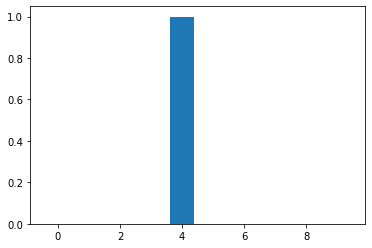

In [18]:
#2.2.5.Decision Tree
from sklearn import tree
model_dt=tree.DecisionTreeClassifier(random_state = 4130)
model_dt.fit(x_train,y_train)
y_predict_dt=model_dt.predict(x_test)
from matplotlib import pyplot
importance = model_dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
#2.2.6.Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)

In [20]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
print("1.Logistic Regression:",classification_report(y_test,y_predict_lr))
print("2.Naive Bayes:",classification_report(y_test,y_predict_nb))
print("3.Linear Discriminant Analysis",classification_report(y_test,y_predict_lda))
print("4.Support Vector Machine",classification_report(y_test,y_predict_svc))
print("5.Decision Tree",classification_report(y_test,y_predict_dt))
print("6.Nearest Neighbor",classification_report(y_test,y_predict_knn))

1.Logistic Regression:               precision    recall  f1-score   support

           0       0.75      0.99      0.85       155
           1       1.00      0.94      0.97       805

    accuracy                           0.94       960
   macro avg       0.87      0.96      0.91       960
weighted avg       0.96      0.94      0.95       960

2.Naive Bayes:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       155
           1       1.00      1.00      1.00       805

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960

3.Linear Discriminant Analysis               precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       1.00      1.00      1.00       805

    accuracy                           1.00       960
   macro avg       0.99      0.99      0.99       960
weigh

## 2.3 Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
clf=RandomForestClassifier(n_estimators=2000,max_features=3,random_state=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [22]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

Accuracy:  0.9958333333333333
4    0.335202
5    0.229881
6    0.180124
7    0.121201
8    0.084934
9    0.044044
3    0.002202
2    0.000996
0    0.000734
1    0.000682
dtype: float64
